In [1]:

import os
os.chdir('..')

In [2]:


import sys
import os
print(os.getcwd())
sys.path.insert(0,'/home/mariia.sidulova/scdn/DomId')
sys.path.insert(0, '/home/mariia.sidulova/scdn/DomId/DomainLab')

from domid.tasks.task_weah import NodeTaskWEAH
from domid.arg_parser import mk_parser_main
from domid.dsets.dset_weah import DsetWEAH
import matplotlib.pyplot as plt
import torch.utils.data
%matplotlib inline

/home/mariia.sidulova/scdn/DomId


In [3]:
sys.path.insert(0,'/home/mariia.sidulova/scdn/DomId')
sys.path.insert(0, '/home/mariia.sidulova/scdn/DomId/DomainLab')

In [4]:
import pandas as pd
data = pd.read_csv('../../Aperio_dataset_v10.csv')

In [83]:

column_names = ['path', 'subject', 'region', 'ann', 'resp', 'age', 'BMI', 'Init_dx']
new_df = pd.DataFrame(columns = column_names)

In [84]:
# sub_counter = -1
# for ii in range(0, len(data)):
#     print(ii, 'out of', len(data))
#     name = data['Filename of initial Aperio slide'][ii]
#     if name[0]=='A':
#         name_ = 'aperio'+name[6:12]
#         path = '../../data_Outside/png_files/Training/'+name_
#         if os.path.exists(path):
#             sub_counter+=1
#             region_set =[]
#             for img in os.listdir(path): 
#                 if img[0]=='a':
#                     if img.split('_')[5]!='Aug': #not augmented
#                         region_set_ =[]
#                         region_set_ = region_set+[img.split('_')[4]]
                    
#                         if len(set(region_set_))<5:
#                             region_set.append(img.split('_')[4])
                            
#                             responder = data['Responder'][ii]
#                             age = data['Age at dx'][ii]
#                             BMI = data['BMI'][ii]
#                             init_dx = data['Initial dx'][ii]
                            
#                             # region_label_ = img.split('_')[4][1:]
#                             # if region_label_=='CAH':
#                             #     region_label = 0
#                             # elif region_label_=='Carcinoma':
#                             #     region_label =1
#                             # else:
#                             #     region_lbel = 3
#                             if responder == 'Y':
#                                 resp = 1
#                             else:
#                                 resp = 0
#                             ann = int(img.split('_')[2])

#                             row ={'path':img, 'subject':sub_counter,'region':img.split('_')[4], 'ann':ann, 'resp':resp, 'age':age, 'BMI':BMI, 'Init_dx':init_dx}
#                             #new_df=new_df.append(row, ignore_index=True)
            
#                             df_new_row = pd.DataFrame(row, index=[0])
                      
#                             new_df = pd.concat([new_df, df_new_row], axis=0, ignore_index=True)
    
#         print(len(set(region_set)), len(region_set_))
# #     if sub_counter>25:
# #         break
                        
#                     #print(row)

# print(new_df)



In [85]:
data = pd.read_csv('../../Aperio_dataset_v10_.csv')

In [86]:
data

,Patient ID,Initial dx,Comments about initial dx slide,Filename of initial Aperio slide,Filename of initial 3D Histech slide,Responder,Age at dx,BMI,BMICAT,Race,...,Benign_Length,CAH_Length_Micron,Carcinoma_Length_Micron,Benign_Length_Micron,SVS Num Scenes,SVS Scene Name,SVS Rect,SVS Num Channels,SVS Resolution,SVS MetaData
0,1,CAH,NaN,APERIO-001-0.SVS,3DHISTECH-1-0.SVS,Y,39.0,37.30,M_BMI,WNH,...,0.0,14673.3,0.0,0.0,1,IMAGE,"(0, 0, 157368, 84574)",3,"(2.533E-07, 2.533E-07)",['APERIO IMAGE LIBRARY V12.0.15 \R\N160528X846...
1,2,CAH,NaN,APERIO-002-0.SVS,3DHISTECH-2-0.SVS,Y,28.0,28.20,L_BMI,WH,...,0.0,13430.6,3530.1,0.0,1,IMAGE,"(0, 0, 123503, 38380)",3,"(2.533E-07, 2.533E-07)",['APERIO IMAGE LIBRARY V12.0.15 \R\N125984X384...
2,4,CAH,NaN,APERIO-004-0.SVS,3DHISTECH-4-0.SVS,N,28.0,46.70,H_BMI,WNH,...,0.0,11015.0,9589.0,0.0,1,IMAGE,"(0, 0, 101592, 92341)",3,"(2.533E-07, 2.533E-07)",['APERIO IMAGE LIBRARY V12.0.15 \R\N103632X924...
3,5,CAH,NaN,APERIO-005-0.SVS,3DHISTECH-5-0.SVS,Y,32.0,36.00,M_BMI,WNH,...,157995.2,16255.9,5999.2,40020.2,1,IMAGE,"(0, 0, 135456, 75813)",3,"(2.533E-07, 2.533E-07)",['APERIO IMAGE LIBRARY V12.0.15 \R\N138176X759...
4,6,CAH,NaN,APERIO-006-0.SVS,3DHISTECH-6-0.SVS,Y,35.0,27.78,L_BMI,ASIAN,...,72512.7,14652.0,0.0,18367.6,1,IMAGE,"(0, 0, 125495, 87592)",3,"(2.533E-07, 2.533E-07)",['APERIO IMAGE LIBRARY V12.0.15 \R\N128016X876...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,184,CAH,NaN,BA-26-84.SVS,1M10.SVS,Y,56.0,65.90,VH_BMI,WNH,...,0.0,21467.4,0.0,0.0,1,IMAGE,"(0, 0, 47808, 43099)",3,"(5.053E-07, 5.053E-07)",['APERIO IMAGE LIBRARY V12.0.15 \R\N48768X4319...
108,186,CAH,NaN,BA-28-77.SVS,1M05.SVS,N,34.0,43.50,M_BMI,AANH,...,0.0,0.0,6258.2,0.0,1,IMAGE,"(0, 0, 35856, 18912)",3,"(5.053E-07, 5.053E-07)",['APERIO IMAGE LIBRARY V12.0.15 \R\N36576X1901...
109,187,CAH,NaN,BA-29-13.SVS,1M13.SVS,Y,43.0,59.60,VH_BMI,WNH,...,0.0,112919.9,0.0,0.0,1,IMAGE,"(0, 0, 57768, 46513)",3,"(5.053E-07, 5.053E-07)",['APERIO IMAGE LIBRARY V12.0.15 \R\N58928X4661...
110,189,CAH,NaN,BA-31-51 A.SVS,1M01.SVS,Y,64.0,62.30,VH_BMI,WNH,...,0.0,46515.2,0.0,0.0,1,IMAGE,"(0, 0, 37848, 34134)",3,"(5.053E-07, 5.053E-07)",['APERIO IMAGE LIBRARY V12.0.15 \R\N38608X3423...


In [87]:
# os.listdir('../../WashU-WSI-data/patches_WashU_Aperio/data/png_files')

In [99]:
path = '../../WashU-WSI-data/patches_WashU_Aperio/data/png_files'
subjects = os.listdir(path)

column_names = ['path', 'subject', 'region', 'ann', 'resp', 'age', 'BMI', 'Init_dx']
new_df = pd.DataFrame(columns = column_names)
subject_counter = 0
for subject in subjects:
    subject_path=os.path.join(path, subject)
    sub_num = int(subject.split('-')[1])
    data_sub = data[data['Patient ID']==sub_num]
    # if len(data_sub)>0:
    #     subject_counter+=1
    patches=os.listdir(subject_path)
    sorted_patches = sorted(patches)
    imgs = [patch for patch in sorted_patches if patch.startswith("aperio")]
    num_patches = 0
    df_new_subject = pd.DataFrame(columns = column_names)
    for image in imgs:
        if num_patches<900:
            #if image.split('_')[5]!='Aug' and num_patches<900: # if not augmented
                if len(data_sub)>0:
                    responder = data_sub['Responder'].values
                    
                
                    age = int(data_sub['Age at dx'].values)
                    
                    BMI = int(data_sub['BMI'].values)
                    init_dx = data_sub['Initial dx'].values
                    if responder[0] == 'Y':
                        resp = 1
                    else:
                        resp = 0
         
                    ann = int(image.split('_')[2])
                    
                        

                    row ={'path':os.path.join(subject, image), 'subject':subject_counter,'region':image.split('_')[4], 'ann':ann, 'resp':resp, 'age':age, 'BMI':BMI, 'Init_dx':init_dx[0]}
                    
                    df_new_row = pd.DataFrame(row, index=[0])
                    df_new_subject = pd.concat([df_new_subject, df_new_row], axis=0, ignore_index=True)
                    num_patches+=1
    if len(df_new_subject) ==900 and len(df_new_subject['region'].unique())<4:               
        new_df = pd.concat([new_df, df_new_subject], axis=0, ignore_index=True)
        subject_counter+=1
        # if subject_counter>3:
        #     break

    
               
print(new_df)
            
            


                                                    path subject      region  \
0      APERIO-126-0/aperio-126-0_anno_1_reg_2Carcinom...       0  2Carcinoma   
1      APERIO-126-0/aperio-126-0_anno_1_reg_2Carcinom...       0  2Carcinoma   
2      APERIO-126-0/aperio-126-0_anno_1_reg_2Carcinom...       0  2Carcinoma   
3      APERIO-126-0/aperio-126-0_anno_1_reg_2Carcinom...       0  2Carcinoma   
4      APERIO-126-0/aperio-126-0_anno_1_reg_2Carcinom...       0  2Carcinoma   
...                                                  ...     ...         ...   
24295  APERIO-048-0/aperio-048-0_anno_2_reg_12CAH_coo...      26       12CAH   
24296  APERIO-048-0/aperio-048-0_anno_2_reg_12CAH_coo...      26       12CAH   
24297  APERIO-048-0/aperio-048-0_anno_2_reg_12CAH_coo...      26       12CAH   
24298  APERIO-048-0/aperio-048-0_anno_2_reg_12CAH_coo...      26       12CAH   
24299  APERIO-048-0/aperio-048-0_anno_2_reg_12CAH_coo...      26       12CAH   

      ann resp age BMI Init_dx  
0     

In [100]:
num_patchers_per_subject = []
for subject in subjects:
    
    subject_path=os.path.join(path, subject)
    # print(subject_path, len(os.listdir(subject_path)))
    num_patchers_per_subject.append(len(os.listdir(subject_path)))

[5932, 2402, 641, 3876, 2659, 1472, 1779, 4785, 1796, 2433, 3057, 1798, 1344, 2362, 4331, 315, 79, 38, 38, 38, 38, 34, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 29, 38, 38, 38, 38, 38, 38, 35, 38, 38, 38, 38, 38, 38, 38, 36, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38]


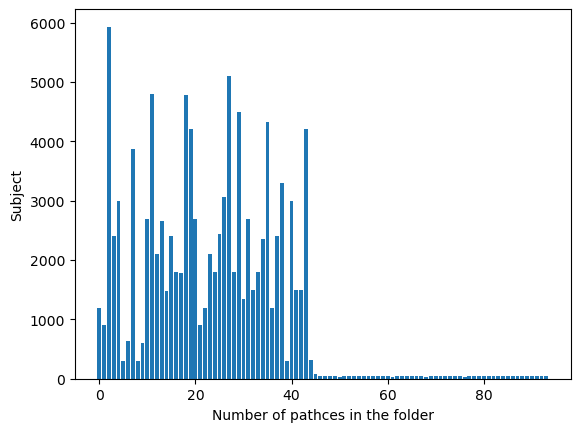

In [101]:
import numpy as np
plt.bar(np.arange(0, len(num_patchers_per_subject)), num_patchers_per_subject)
not_devisible = [num for num in num_patchers_per_subject if num%300!=0 ]
plt.xlabel('Number of pathces in the folder')
plt.ylabel('Subject')
print(not_devisible)

In [102]:
new_df['region'][:1202]

0       2Carcinoma
1       2Carcinoma
2       2Carcinoma
3       2Carcinoma
4       2Carcinoma
           ...    
1197    2Carcinoma
1198    2Carcinoma
1199    2Carcinoma
1200    7Carcinoma
1201    7Carcinoma
Name: region, Length: 1202, dtype: object

Text(0.5, 1.0, 'Response to the treatment')

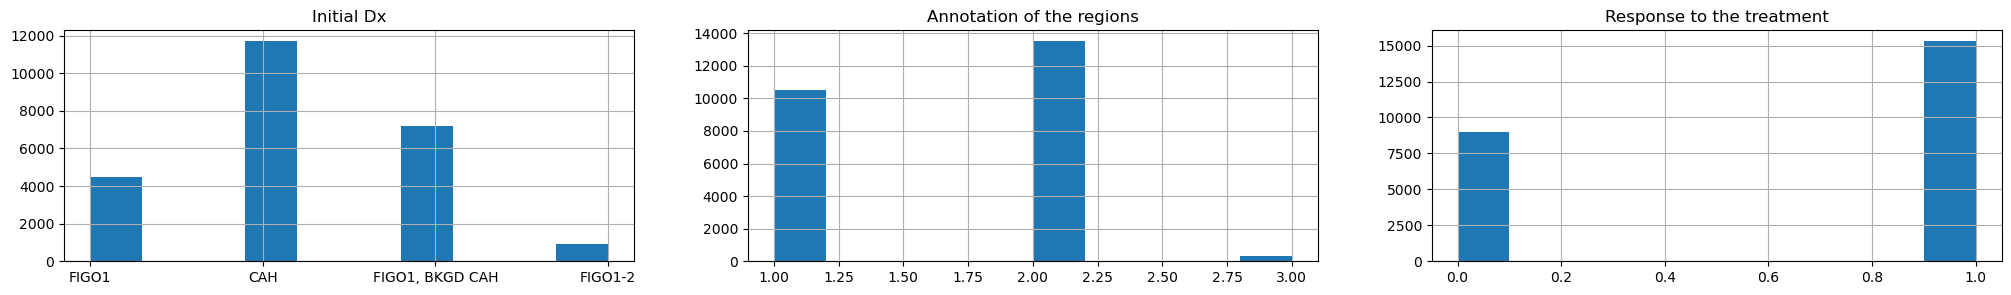

In [103]:
plt.figure(figsize = (25, 3))
plt.subplot(1, 3, 1)
new_df['Init_dx'].hist()
plt.title('Initial Dx')

plt.subplot(1, 3, 2)
new_df['ann'].hist()
plt.title('Annotation of the regions')

plt.subplot(1, 3, 3)
new_df['resp'].hist()
plt.title('Response to the treatment')

In [104]:
new_df['resp'].unique()
new_df_ = new_df

In [105]:

for ii in range(0, 70):
    print(ii, 'subject', new_df_[new_df_['subject']==ii]['region'].unique(), len(new_df_[new_df_['subject']==ii]) )
    # if len(new_df_[new_df_['subject']==ii])<1200:
    #     new_df
    



0 subject ['2Carcinoma' '3Carcinoma' '7Carcinoma'] 900
1 subject ['2Carcinoma' '7Carcinoma' '4CAH'] 900
2 subject ['10Carcinoma' '11Carcinoma' '2Carcinoma'] 900
3 subject ['2Carcinoma' '3Carcinoma' '1CAH'] 900
4 subject ['1CAH' '2CAH' '3CAH'] 900
5 subject ['1Carcinoma' '10CAH' '11CAH'] 900
6 subject ['1CAH' '2CAH' '3CAH'] 900
7 subject ['1Carcinoma' '2Carcinoma' '3Carcinoma'] 900
8 subject ['1Carcinoma' '2Carcinoma' '3Carcinoma'] 900
9 subject ['1Carcinoma' '2Carcinoma' '3Carcinoma'] 900
10 subject ['1CAH' '4CAH' '6CAH'] 900
11 subject ['1Carcinoma' '1CAH' '4CAH'] 900
12 subject ['1CAH' '2CAH' '3CAH'] 900
13 subject ['1Carcinoma' '2Carcinoma' '10CAH'] 900
14 subject ['10CAH' '1CAH' '2CAH'] 900
15 subject ['3CAH' '4CAH' '5CAH'] 900
16 subject ['1Carcinoma' '2Carcinoma' '3Carcinoma'] 900
17 subject ['1CAH' '2CAH' '3CAH'] 900
18 subject ['1CAH' '3CAH' '4CAH'] 900
19 subject ['10CAH' '11CAH' '13CAH'] 900
20 subject ['1CAH' '2CAH' '1Benign'] 900
21 subject ['1Carcinoma' '1CAH' '2CAH'] 900


In [109]:
# for ii in range(0, 35):

#     print('subject', new_df[new_df['subject']==ii].iloc[0,:])
#     print(len(new_df[new_df['subject']==ii]))


In [110]:
new_df.to_csv('../../dset_WEAH.csv')

In [111]:
new_df


,path,subject,region,ann,resp,age,BMI,Init_dx
0,APERIO-126-0/aperio-126-0_anno_1_reg_2Carcinom...,0,2Carcinoma,1,0,71,26,FIGO1
1,APERIO-126-0/aperio-126-0_anno_1_reg_2Carcinom...,0,2Carcinoma,1,0,71,26,FIGO1
2,APERIO-126-0/aperio-126-0_anno_1_reg_2Carcinom...,0,2Carcinoma,1,0,71,26,FIGO1
3,APERIO-126-0/aperio-126-0_anno_1_reg_2Carcinom...,0,2Carcinoma,1,0,71,26,FIGO1
4,APERIO-126-0/aperio-126-0_anno_1_reg_2Carcinom...,0,2Carcinoma,1,0,71,26,FIGO1
...,...,...,...,...,...,...,...,...
24295,APERIO-048-0/aperio-048-0_anno_2_reg_12CAH_coo...,26,12CAH,2,1,52,55,CAH
24296,APERIO-048-0/aperio-048-0_anno_2_reg_12CAH_coo...,26,12CAH,2,1,52,55,CAH
24297,APERIO-048-0/aperio-048-0_anno_2_reg_12CAH_coo...,26,12CAH,2,1,52,55,CAH
24298,APERIO-048-0/aperio-048-0_anno_2_reg_12CAH_coo...,26,12CAH,2,1,52,55,CAH


In [23]:
new_df[new_df['subject']==4]

,path,subject,region,ann,resp,age,BMI,CAH
